# Using Predictive Analysis To Predict Melbourne House Price  

By Niladri Ghosh

## 1. Identify Problem

Real Estate has became one of the main places to put your investment in recent times. With the current instability in the market it has became too risky to invest in stock markets, gold prices constanly going down and goverment not considering crypocurrency as a serious option. That being said, owing a property seems to be a viable option to put your money in. So with this motivation we need to analyze what fectors leads to the price of a property in an area, we'll be predicting house prices in Boston, USA.

### 1.1 Expected Outcome

Given house price data from Domain.com.au (and other sources) provides various features of a particular property like number of rooms, address, suburb ,etc. Since this is a __regression problem__, our __final output would be the price of the house estimated by our model__.

### 1.2 Objective

Since many features in our data is categorical value, we need to find appropriate techniques to convert them into integers, as our model only inputs numerical values and finally predict house prices. In machine learning this is a regression problem.

> Thus, the goal is to estimate the price of various houses provided the different unique features of the property. To acheive this we have used machine learning regression methods to fit a function that can predict the continuos values (price) for the new inputs.

### 1.3 Identify Data Sources

The Boston House Price dataset is available at scikit-learn dataset. As the dataset has been provided by scikit learn, it is meant for only analytical and predictive applications. The data is totally clean and accurate to be worked upon. The dataset contains 505 rows of data and 14 columns (20 features and 1 taget).

* The 14th column provides the price of the house.
* Columns 1-13 provides various details for the given house.

__Getting Started : Load libraries and set options__

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Download the boston dataset into the memory via the scikit-learn api. Next we need to structure the data to fit our standards and the necessities

In [2]:
# import boston dataframe
from sklearn.datasets import load_boston

boston = load_boston()
data = boston.data
target = boston.target
names = boston.feature_names
target = target.reshape(target.shape[0],-1)
data_all = np.concatenate([data,target], axis = 1)
names_all = np.concatenate([names,np.array(["MEDV"])], axis = 0)
boston_data = pd.DataFrame(data=data_all,columns=names_all)

In [3]:
# check data 
boston_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Shape of our dataset

In [4]:
# shape of data
boston_data.shape

(506, 14)

Check for null and duplicate values.

In [5]:
# check  null values
boston_data.isnull().values.any()

False

In [6]:
# check for duplicated values
boston_data.duplicated().values.any()

False

No null or duplicated values present in the dataset, as expected.

__Check weather the data is normally distributed.__

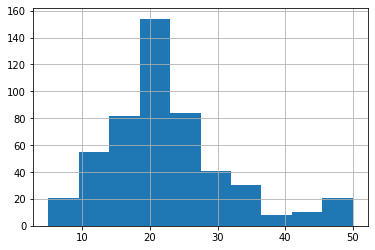

In [7]:
# lets draw histogram for MEDV
boston_data.MEDV.hist();

From the looks of it we can clearly see that the data is not normally distributed. The __data is positive / right skwed__. Hence we have to __perform normalisation__ on the dataset.

In [8]:
# check normality using scipy
from scipy.stats.mstats import normaltest

normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

Since in these test we choose __null hypothesis : data is normally distributed__, we get p_value too small and for our significance value 0.05, the __value is less than significance value__. Therefor __we cannot accept our null hypothesis__, as suggested by Frequentist approch. Hence the data is not nomally distributed as implied by the above histogram as well. __We should now normlize our data.__

Three famous ways of noramalization :
* log transformation
* square root transformation
* box cox transformation


### Test log transformation

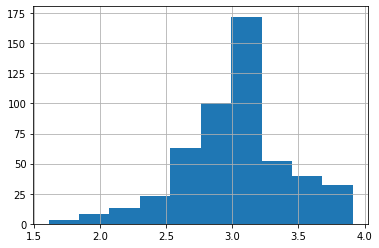

In [9]:
# Test log transformation
log_medv = np.log(boston_data.MEDV)
log_medv.hist();

In [10]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

The p-value is not big enough to accept the null hypothesis. Plus the histogram also shows that the data is still not normally distributed, left skew. Hence we need to find a suitable transformation.

### Test squared root transformation

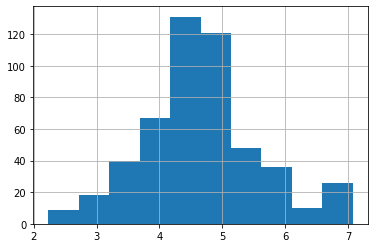

In [11]:
# Test squared root transformation
sqrt_medv = np.sqrt(boston_data.MEDV)
sqrt_medv.hist();

In [12]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

The p-value is still not great enough to accept the null hypothesis. Plus the histogram also shows that the data is still not normally distributed bit skewed to the right. Hence we need to find a suitable transformation.

### Test box cox transformation

In [13]:
# Test box cox transformation
from scipy.stats import boxcox
result = boxcox(boston_data.MEDV)
boxcox_medv = result[0]
lambda_ = result[1]

In [14]:
lambda_

0.2166209012915364

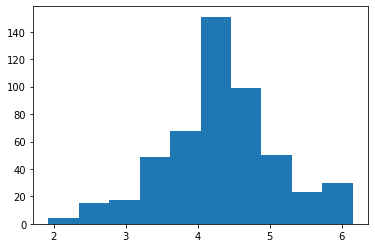

In [15]:
plt.hist(boxcox_medv);

In [16]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Finally through box cox transformation we can finally cannot reject the null hypothesis as p-value > 0.05 (our significance value) and therefor our data is finally normally distributed for significance value 0.05, we can visualize in the histogram too. __We will use box cox for transformation.__

## Begin Regression Analysis

In [17]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [18]:
# model instance
lr = LinearRegression()

In [19]:
# create x and y column for feture and target
X = boston_data.drop('MEDV',axis=1)
y = boston_data['MEDV']

In [20]:
# create polynomial features
pf = PolynomialFeatures(degree=2, include_bias = False)
X_pf = pf.fit_transform(X)

In [21]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X_pf,y,test_size=0.3, random_state = 72018)

In [22]:
# Fit standard scaler on X_train
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [23]:
# APPLY BOX COX TRANSFORMATION
bc_res = boxcox(y_train)
y_train_bc = bc_res[0]
lam = bc_res[1]

In [24]:
# Tain model
lr.fit(X_train_s,y_train_bc)

LinearRegression()

In [25]:
# Prediction for X_test
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [26]:
# As we have applied box cox tranformation on the training model we need to apply inverse box cox to get the actual values
from scipy.special import inv_boxcox
y_pred_trans = inv_boxcox(y_pred_bc,lam)

In [27]:
# check r2 score
r2_score(y_pred_trans, y_test)

0.8794001851338584

In [28]:
# Lets check r2 score, where we didn't apply boxcox transformation
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.8555202098064159

### Conclusion

We can clearly see that when we aplly boxcox transformation on target we get an r2 score of 0.87 which is rather good when apllied on a property prediction. And when we check the r2 score when we didn't applied the boxcox we get 0.85 which is much less. Therefor in this particular scenario boxcox tranformation lead to better prediction.